# Scikit-Learn Jupyer Notebook
*****
*****

## Outline of this Notebook:

1. Overview of the scikit-learn package
2. Dataset: Penguin Dataset
    - Importing Packages for the Notebook
    - Exploring the Dataset
    - Preprocessing the Data
    - Data Visualisation
3.  Data Modelling: Regression
    - Random Forest
    - Decision Tree
    - Naive Bayes
4. Comparison between models 
5. Conclusion
6. References

## 1. Overview of the scikit-learn library
******

### Defining Learning Problems with Scikit-Learn
***

The focus of machine learning is "acquiring skills or knowledge from experience"https://machinelearningmastery.com/types-of-learning-in-machine-learning/. Within the field itslef, there are many subfileds of study. The focus of this assessment is two main learning problems with Scikit-Learn. These are supervised and unsupervised learning.
<br>
<br>
**Supervised learning** occurs when the data"comes with additional attributes tht we want to predict"https://scikit-learn.org/stable/tutorial/basic/tutorial.html. The main aim is to assess and predict correlations of real world phenonema. The input and output are specified in this type of learning https://searchenterpriseai.techtarget.com/definition/machine-learning-ML
<br>
- **classification:** samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

- **regression:** if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
<br>
**Unsupervised learning** involves algorithms "consists of a set of input vectors x without any corresponding target values.... goal in such problems may be to discover groups of similiar examples within the data or to determine the distribution of data" https://scikit-learn.org/stable/tutorial/basic/tutorial.html .he data and the recommendations generated from the algorithms are pre determined. https://searchenterpriseai.techtarget.com/definition/machine-learning-ML

## 2. Dataset: Penguin Dataset
******

### Importing packages
<br>

The Scikit-Learn package is built upon SciPy (Scientific Python) that most be installed beforehand https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/c2. SciPy packages that will be used in this notebook are imported in the below code block alongwith the preferred plot modelling. 

In [126]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for all graphical and plotting purposes
import seaborn as sns
#import missingno as msno
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import pandas as pd # numerical arrarys
import numpy as np # data frames
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical plots
import sklearn.linear_model as ln # Logistic Regression
import sklearn.neighbors as nei # K nearest neighbours
import sklearn.model_selection as mod # helper functions
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [127]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [128]:
df = pd.read_csv("penguins_size.csv") # reading in the dataset

### Exploring the Dataset

The Palmer Penguin dataset will be used in this project.https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/version/1?select=penguins_size.csv. In this section, the dataset is exploered at a higher level to establish any initial observations determine the scikit-learn packages that will be used and if there are any issues with the data that need to be resolved.

The below functions look at samples from the dataset, its composition and whether or not any datapoints are missing.  

In [129]:
df.shape

(344, 7)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [139]:
df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
315,Gentoo,Biscoe,50.8,15.7,226.0,5200.0,male
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male
86,Adelie,Dream,37.0,16.5,185.0,3400.0,female
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,female
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
248,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,female
37,Adelie,Biscoe,43.2,19.0,197.0,4775.0,male
300,Gentoo,Biscoe,49.1,14.5,212.0,4625.0,female
279,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,male
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,female


In [140]:
print(df['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [142]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [132]:
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [143]:
df["island"].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [133]:
df.describe() # important in prediction of the class later on

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Preprocessing the Data

### Dealing with Nan within the dataset
<br>
From the initial analysis, there are null values within the dataset, this section explores this further and the potential impact it may have on the dataset.

In [145]:
df.isnull().values.any()

True

In [146]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [148]:
df.isnull().sum().sum() #https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

19

In [150]:
# creating bool series True for NaN values https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
bool_series = pd.isnull(df["sex"]) 
    
# filtering data 
# displaying data only with Gender = NaN 
df[bool_series]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
61,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
103,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
108,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
109,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
110,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
111,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [151]:
df.dropna(axis=0, how='all', subset=['sex'], inplace=True) #it is decided that all rows with NaN will be dropped as gender may form part of the prediction process later on and these are incomplete datapoints

In [152]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [153]:
df.shape

(333, 7)

In [154]:
df["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

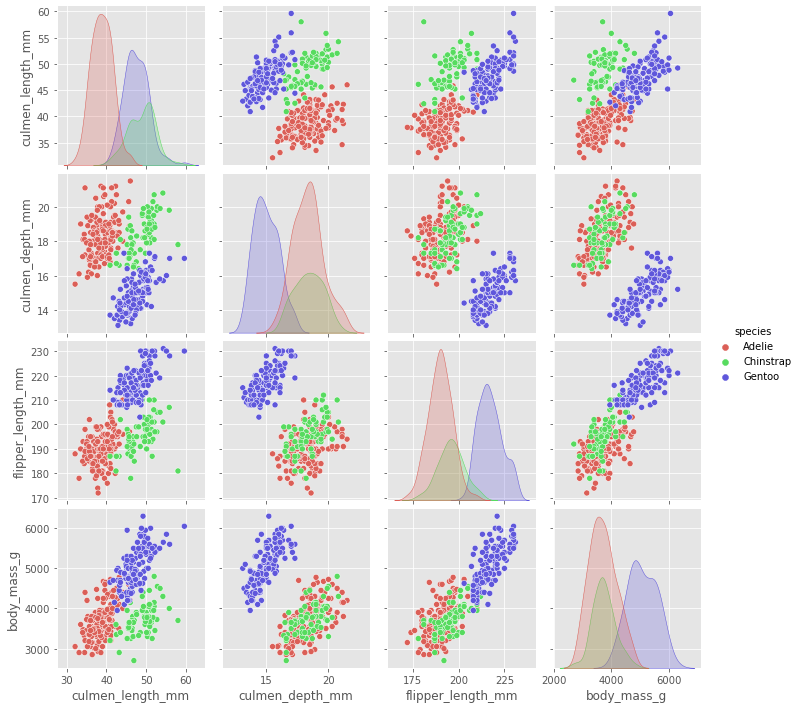

In [134]:
sns.pairplot(data=df, hue='species', palette=sns.color_palette(palette='hls' ,n_colors=3))

The above Pairplot provides an overview of the data and key information to inform the notebook can be ascertained. In this case, the Gentoo species seems to have more distinct feature from the other two species which can possible be used to predict the species later on. From an initial analysis of the data, Gentoo seems to have different attributes to the other species making it possible to predict a Gentoo penguin from the other two species. Adelie and Chinstrap are more similiar in their feature. Prediction of  each of the species from their attributes may be possible using measurements of the body mass and culmen length, culmen length and culmen depth and also flipper length and culmen length. These will form the basis of the machine learning algorithms discussed and implemented in this notebook.

Correlation

Train and Test https://pythonforbiologists.com/machine-learning-for-biology-part-three.html

X=df.iloc[:,1:5].values # https://www.kaggle.com/mainakchaudhuri/penguin-data-analysis#3.1-Random-Forest:
y=df.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

https://github.com/mcnakhaee/palmerpenguins
decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.metrics import confusion_matrix
### To deal with missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

X,y = load_penguins(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100,
                                            random_state=0)
imp = IterativeImputer(max_iter=10, random_state=0)
clf = make_pipeline(imp, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred,labels=['Adelie','Chinstrap','Gentoo']))
array([[47,  1,  0],
       [ 3, 17,  0],
       [ 0,  0, 32]], dtype=int64)
print(clf.score(X_test,y_test))
0.96

Text(0, 0.5, 'Body Mass')

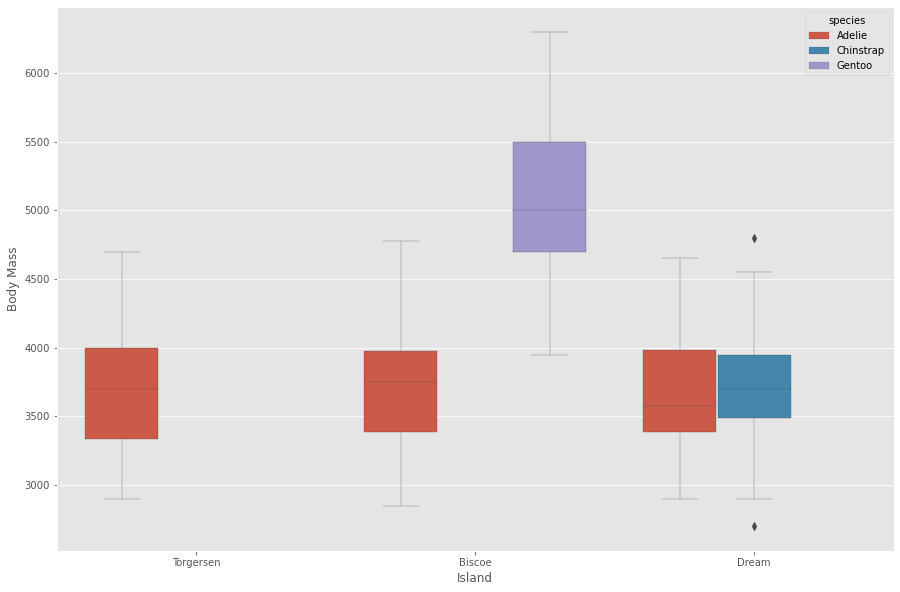

In [135]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

## Data Modelling: Regression
******

## Comparison between Models
******

In [136]:
import pingouin as pg # https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html#pingouin.pairwise_gameshowell
df = pg.read_dataset('penguins')
pg.pairwise_gameshowell(data=df, dv='body_mass_g',
                        between='species').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Adelie,Chinstrap,3700.662,3733.088,-32.426,59.706,-0.543,152.455,0.834,-0.079
1,Adelie,Gentoo,3700.662,5076.016,-1375.354,58.811,-23.386,249.643,0.001,-2.833
2,Chinstrap,Gentoo,3733.088,5076.016,-1342.928,65.103,-20.628,170.404,0.001,-3.105


## Conclusion
******

Scikit Learn is a Python library for machine learning, consisting of learning algorithms for machine learning and statistical modeling. The library was was initially developed by David Cournapeau in 2007 before being further developed by the FIRCA (French Institute for Research in Computer Science and Automation) leading to its first public realesae in 2010. https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htmScikit. It's popularity of use is largely due to ease of use, being open sourse, portable, powerful and wide ranging content and relative flexibility for use in Machine Learning projects. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab 

<br>

Scikit-Learn's purpose is data modellying and is easily integrated with other packages to provide data handling, manipulation and visualisation. It is built upon Python packages which include Numpy, SciPy Matplotlib. Pandas and Sci Py. The library provides methods of supervised and unsupervised learning algorithms including regression, classification and clustering of data. The library also offers other functions including ensemble methods, feature manipulation, outlier detection and model selection and validation. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab

## References

# End

*******